## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import os
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

def make_csv(query, filename):
   
    # check if file already exists
    if os.path.exists(filename):
        df = pd.read_csv(filename)
        return df
    # ensure all columns are displayed when viewing a pandas dataframe
    pd.set_option('display.max_columns', None)
    
    # Creating a connection to the database
    print("creating conecction...")
    con = psycopg2.connect(database="mid_term_project", 
                           user="lhl_student", 
                           password="lhl_student", 
                           host="lhl-data-bootcamp.crzjul5qln0e.ca-central-1.rds.amazonaws.com", 
                           port="5432")


    # creating a cursor object
    cur = con.cursor()
    # running an sql query
    print("running query...")
    cur.execute(query)
    # Storing the result
    rows = cur.fetchall()
    cols = [desc[0] for desc in cur.description]

    con.close()

    # writing the csv file
    print("writing file...")
    df = pd.DataFrame(rows, columns=cols)
    df.to_csv(filename, index=False)
    
    print('Done')
    
    return df

In [2]:
make_csv("SELECT * FROM flights LIMIT 100", "test")

creating conecction...
running query...
writing file...
Done


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-08-31,WN,WN,WN,5490,WN,N798SW,5490,11292,DEN,"Denver, CO",10821,BWI,"Baltimore, MD",545,545.0,0.0,10.0,555.0,1100.0,3.0,1105,1103.0,-2.0,0.0,None,0.0,N,200.0,198.0,185.0,1.0,1491.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-08-31,WN,WN,WN,1520,WN,N964WN,1520,11292,DEN,"Denver, CO",11042,CLE,"Cleveland, OH",1720,1740.0,20.0,29.0,1809.0,2241.0,4.0,2205,2245.0,40.0,0.0,None,0.0,N,165.0,185.0,152.0,1.0,1201.0,0.0,0.0,20.0,0.0,20.0,None,NaN,NaN,None
2,2018-08-31,WN,WN,WN,2138,WN,N920WN,2138,11292,DEN,"Denver, CO",11066,CMH,"Columbus, OH",2015,2129.0,74.0,12.0,2141.0,155.0,4.0,55,159.0,64.0,0.0,None,0.0,N,160.0,150.0,134.0,1.0,1154.0,1.0,0.0,0.0,0.0,63.0,None,NaN,NaN,None
3,2018-08-31,WN,WN,WN,254,WN,N8687A,254,11292,DEN,"Denver, CO",11193,CVG,"Cincinnati, OH",1240,1301.0,21.0,22.0,1323.0,1746.0,4.0,1725,1750.0,25.0,0.0,None,0.0,N,165.0,169.0,143.0,1.0,1069.0,0.0,0.0,4.0,0.0,21.0,None,NaN,NaN,None
4,2018-08-31,WN,WN,WN,142,WN,N8561Z,142,11292,DEN,"Denver, CO",11259,DAL,"Dallas, TX",1210,1208.0,-2.0,8.0,1216.0,1444.0,3.0,1505,1447.0,-18.0,0.0,None,0.0,N,115.0,99.0,88.0,1.0,651.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-08-31,WN,WN,WN,3154,WN,N767SW,3154,11292,DEN,"Denver, CO",13891,ONT,"Ontario, CA",2220,2400.0,100.0,12.0,12.0,107.0,4.0,2340,111.0,91.0,0.0,None,0.0,N,140.0,131.0,115.0,1.0,819.0,31.0,0.0,0.0,0.0,60.0,None,NaN,NaN,None
96,2018-08-31,WN,WN,WN,690,WN,N7882B,690,11292,DEN,"Denver, CO",14057,PDX,"Portland, OR",810,812.0,2.0,16.0,828.0,942.0,3.0,1000,945.0,-15.0,0.0,None,0.0,N,170.0,153.0,134.0,1.0,991.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
97,2018-08-31,WN,WN,WN,1500,WN,N7868K,1500,11292,DEN,"Denver, CO",14057,PDX,"Portland, OR",1650,1655.0,5.0,49.0,1744.0,1901.0,3.0,1820,1904.0,44.0,0.0,None,0.0,N,150.0,189.0,137.0,1.0,991.0,0.0,0.0,44.0,0.0,0.0,None,NaN,NaN,None
98,2018-08-31,WN,WN,WN,1706,WN,N725SW,1706,11292,DEN,"Denver, CO",14057,PDX,"Portland, OR",2210,2225.0,15.0,10.0,2235.0,2350.0,3.0,2350,2353.0,3.0,0.0,None,0.0,N,160.0,148.0,135.0,1.0,991.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [3]:
x = pd.read_csv("test")
x.shape

(100, 42)

In [4]:
make_csv("SELECT * FROM flights ORDER BY RANDOM() LIMIT 100000", "sample3")

creating conecction...
running query...
writing file...
Done


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-23,UA,UA_CODESHARE,UA,5035,OO,N925SW,5035,13930,ORD,"Chicago, IL",11823,FWA,"Fort Wayne, IN",1155,1151.0,-4.0,30.0,1221.0,1353.0,4.0,1359,1357.0,-2.0,0.0,None,0.0,N,64.0,66.0,32.0,1.0,157.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-03-13,WN,WN,WN,2342,WN,N967WN,2342,11259,DAL,"Dallas, TX",11057,CLT,"Charlotte, NC",1620,1620.0,0.0,8.0,1628.0,1915.0,6.0,1940,1921.0,-19.0,0.0,None,0.0,N,140.0,121.0,107.0,1.0,926.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-07-01,WN,WN,WN,667,WN,N8536Z,667,10423,AUS,"Austin, TX",10821,BWI,"Baltimore, MD",525,522.0,-3.0,7.0,529.0,924.0,5.0,935,929.0,-6.0,0.0,None,0.0,N,190.0,187.0,175.0,1.0,1342.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-05-20,DL,DL,DL,2414,DL,N3763D,2414,14747,SEA,"Seattle, WA",12889,LAS,"Las Vegas, NV",802,800.0,-2.0,24.0,824.0,1012.0,9.0,1038,1021.0,-17.0,0.0,None,0.0,N,156.0,141.0,108.0,1.0,867.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-10-05,DL,DL,DL,927,DL,N365NW,927,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1635,1629.0,-6.0,34.0,1703.0,1845.0,4.0,1841,1849.0,8.0,0.0,None,0.0,N,186.0,200.0,162.0,1.0,1020.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2019-12-16,UA,UA,UA,2016,UA,N838UA,2016,14122,PIT,"Pittsburgh, PA",12266,IAH,"Houston, TX",1635,1631.0,-4.0,11.0,1642.0,1903.0,9.0,1848,1912.0,24.0,0.0,None,0.0,N,193.0,221.0,201.0,1.0,1117.0,0.0,0.0,24.0,0.0,0.0,None,NaN,NaN,None
99996,2018-06-12,AA,AA,AA,1435,AA,N144AN,1435,11298,DFW,"Dallas/Fort Worth, TX",10423,AUS,"Austin, TX",2115,2156.0,41.0,9.0,2205.0,2236.0,6.0,2208,2242.0,34.0,0.0,None,0.0,N,53.0,46.0,31.0,1.0,190.0,0.0,0.0,0.0,0.0,34.0,None,NaN,NaN,None
99997,2019-08-31,DL,DL,DL,1044,DL,N852DN,1044,14747,SEA,"Seattle, WA",10397,ATL,"Atlanta, GA",620,616.0,-4.0,12.0,628.0,1330.0,8.0,1402,1338.0,-24.0,0.0,None,0.0,N,282.0,262.0,242.0,1.0,2182.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
99998,2019-02-21,DL,DL,DL,2079,DL,N354NB,2079,11433,DTW,"Detroit, MI",11278,DCA,"Washington, DC",2227,2220.0,-7.0,13.0,2233.0,2334.0,2.0,2357,2336.0,-21.0,0.0,None,0.0,N,90.0,76.0,61.0,1.0,405.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [5]:
#this is the one I'm using, truly random sample
sample3 = pd.read_csv("sample3")
sample3.shape

(100000, 42)

In [6]:
make_csv("SELECT * FROM passengers ORDER BY RANDOM() LIMIT 100000", "passengers")

creating conecction...
running query...
writing file...
Done


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,42900.0,178.0,27.0,7939.0,338.0,198.0,42.0,35.0,AS,19930,Alaska Airlines Inc.,D,AS,Alaska Airlines Inc.,3,3,15991,35991,YAK,"Yakutat, AK",US,United States,12523,32523,JNU,"Juneau, AK",US,United States,6,634,1,2019,5,1,F,DU
1,0.0,13.0,474186.0,2340.0,2116.0,1085.0,0.0,2794.0,0.0,0.0,WW,21598,WOW Air ehf,I,WW,WOW Air ehf,0,0,12651,32651,KEF,"Keflavik/Reykjavik, Iceland",IS,Iceland,14122,30198,PIT,"Pittsburgh, PA",US,United States,6,694,1,2018,8,6,F,IF
2,35.0,35.0,350000.0,1750.0,1525.0,0.0,0.0,655.0,4908.0,3765.0,EV,20366,ExpressJet Airlines LLC,D,EV,ExpressJet Airlines Inc.,3,3,16149,36149,YOW,"Ottawa, Canada",CA,Canada,13930,30977,ORD,"Chicago, IL",US,United States,6,675,1,2018,9,2,F,IU
3,0.0,1.0,1650.0,8.0,0.0,307.0,82.0,54.0,35.0,23.0,GV,20455,Grant Aviation,D,GV,Grant Aviation,1,5,14738,34738,SDP,"Sandpoint, AK",US,United States,13704,33704,NLG,"Nelson Lagoon, AK",US,United States,1,194,1,2019,1,1,F,DU
4,1.0,1.0,34446.0,132.0,91.0,36.0,0.0,980.0,146.0,120.0,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,13487,31650,MSP,"Minneapolis, MN",US,United States,14100,34100,PHL,"Philadelphia, PA",US,United States,6,698,1,2019,4,2,F,DU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,74.0,71.0,2487600.0,8827.0,6209.0,0.0,0.0,417.0,6333.0,4652.0,AS,19930,Alaska Airlines Inc.,D,AS,Alaska Airlines Inc.,3,3,14831,32457,SJC,"San Jose, CA",US,United States,14679,33570,SAN,"San Diego, CA",US,United States,6,698,1,2019,8,1,F,DU
99996,7.0,7.0,872072.0,0.0,0.0,416697.0,0.0,872.0,957.0,782.0,FX,20107,Federal Express Corporation,D,FX,Federal Express Corporation,3,3,11292,30325,DEN,"Denver, CO",US,United States,13244,33244,MEM,"Memphis, TN",US,United States,6,626,2,2017,7,2,G,DU
99997,44.0,40.0,1288000.0,5708.0,4309.0,1249.0,0.0,1066.0,6728.0,5988.0,WN,19393,Southwest Airlines Co.,D,WN,Southwest Airlines Co.,3,3,13204,31454,MCO,"Orlando, FL",US,United States,13342,33342,MKE,"Milwaukee, WI",US,United States,6,619,1,2016,10,3,F,DU
99998,0.0,1.0,42500.0,173.0,41.0,0.0,0.0,370.0,70.0,60.0,GL,20402,Miami Air International,D,GL,Miami Air International,2,2,11003,31003,CID,"Cedar Rapids/Iowa City, IA",US,United States,12884,32884,LAN,"Lansing, MI",US,United States,6,614,1,2018,12,1,L,DU


In [7]:
passengers = pd.read_csv("passengers")
passengers.shape

(100000, 38)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [8]:
import seaborn as sns
#**arr_delay**: Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.
arr_delay = sample3['arr_delay']
arr_delay.size

100000

(-300.0, 300.0)

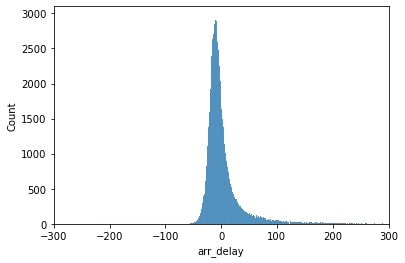

In [9]:
sns.histplot(arr_delay)
plt.xlim(-300, 300)

In [10]:
#pretty normal distribution, skewed to the right as expected (delays can be much longer than arriving so much earlier than expected)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [11]:
import datetime as dt
sample3['fl_date'] = pd.to_datetime(sample3['fl_date'])
sample3['fl_date']

0       2019-11-23
1       2019-03-13
2       2019-07-01
3       2019-05-20
4       2018-10-05
           ...    
99995   2019-12-16
99996   2018-06-12
99997   2019-08-31
99998   2019-02-21
99999   2018-11-17
Name: fl_date, Length: 100000, dtype: datetime64[ns]

In [12]:
sample3['month'] = sample3['fl_date'].dt.month
monthly_count = sample3.groupby(['month'])['arr_delay'].count()
monthly_count = pd.DataFrame(monthly_count)
monthly_count

,arr_delay
month,
1,7485
2,7052
3,8306
4,8000
5,8475
6,8450
7,8824
8,8643
9,7978


<AxesSubplot:xlabel='month', ylabel='arr_delay'>

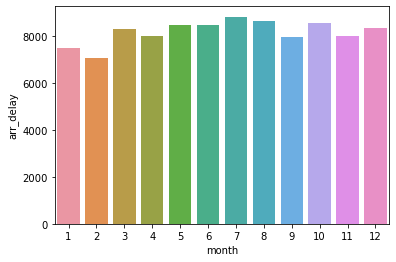

In [13]:
sns.barplot(x= monthly_count.index,y=monthly_count['arr_delay'])

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [14]:
sample3['dep_delay'].mean(), sample3['dep_delay'].count()

(10.483640611508964, 98445)

In [15]:
sample3['arr_delay'].mean()

5.428422940529083

In [16]:
task5_count = 0
for i in sample3['dep_delay']:
    if i > 0:
        task5_count += 1

In [17]:
task5_count/sample3['dep_delay'].count()

0.3414190664838235

#### **Task 6**: How many states cover 50% of US air traffic? 

In [18]:
sample3[['city', 'country']] = sample3['origin_city_name'].str.split(',', expand=True, n=2)

In [19]:
sample3['country'].unique()

array([' IL', ' TX', ' WA', ' NY', ' MA', ' OR', ' GA', ' CA', ' HI',
       ' NC', ' MO', ' AL', ' NJ', ' DC', ' MD', ' LA', ' VT', ' SC',
       ' AZ', ' MT', ' FL', ' NV', ' CO', ' UT', ' IA', ' PA', ' OH',
       ' VA', ' NE', ' ID', ' MN', ' AR', ' OK', ' RI', ' VI', ' TN',
       ' PR', ' NH', ' MI', ' AK', ' IN', ' WI', ' ME', ' ND', ' WV',
       ' CT', ' KY', ' WY', ' MS', ' NM', ' KS', ' SD', ' TT'],
      dtype=object)

In [20]:
sample3.groupby(['country'])['country'].count()

country
 AK      500
 AL      554
 AR      428
 AZ     2623
 CA    10934
 CO     3936
 CT      398
 DC     2967
 FL     7222
 GA     5357
 HI     1475
 IA      361
 ID      411
 IL     6345
 IN      914
 KS      202
 KY      484
 LA     1039
 MA     1979
 MD     1326
 ME      282
 MI     2853
 MN     2230
 MO     1871
 MS      207
 MT      370
 NC     4573
 ND      285
 NE      435
 NH      147
 NJ     2140
 NM      363
 NV     2394
 NY     5188
 OH     2257
 OK      601
 OR     1377
 PA     2952
 PR      352
 RI      246
 SC      827
 SD      185
 TN     1734
 TT       26
 TX    10017
 UT     1508
 VA      997
 VI       50
 VT      167
 WA     2764
 WI      918
 WV      110
 WY      119
Name: country, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [21]:
sample3['avg_velocity'] = sample3['distance']/sample3['air_time']*60
sample3['avg_velocity']

0        294.375000
1        519.252336
2        460.114286
3        481.666667
4        377.777778
            ...    
99995    333.432836
99996    367.741935
99997    540.991736
99998    398.360656
99999    391.111111
Name: avg_velocity, Length: 100000, dtype: float64

In [22]:
#finding the avg_velocity of planes with departure delays
avg_v = []
avg_v_no_delay =[]
for i, item in enumerate(sample3['dep_delay']):
    if item > 0:
        avg_v.append(sample3['avg_velocity'][i])
    else:
        avg_v_no_delay.append(sample3['avg_velocity'][i])

In [23]:
#avg MPH of planes with departure delays
x=pd.DataFrame(avg_v)
x.mean()

0    405.244581
dtype: float64

In [24]:
#avg MPH of planes with no departure delays
xx=pd.DataFrame(avg_v_no_delay)
xx.mean()

0    395.429633
dtype: float64

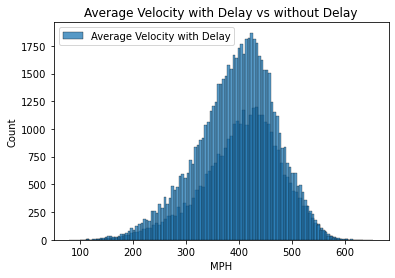

In [83]:
hist = sns.histplot(avg_v)
hist.set_title('Average Velocity with Delay vs without Delay')
hist.set_xlabel('MPH')
hist.legend(labels=['Average Velocity with Delay'])
histo = sns.histplot(avg_v_no_delay)



In [26]:
#as we can see in the above that delays do impact the average velocity by a small amount ~10 MPH

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [27]:
sample3['origin'].value_counts().head(15)

ATL    5011
ORD    5004
DFW    3824
DEN    3502
LAX    3201
CLT    3099
DTW    2278
SEA    2266
SFO    2244
PHX    2244
IAH    2215
LGA    2102
MSP    2091
LAS    2080
EWR    2053
Name: origin, dtype: int64

In [28]:
passengers[['passengers','origin']].groupby(['origin'])['passengers'].sum().sort_values(ascending=False).head(15)

origin
ATL    10900428.0
LAX     9371665.0
ORD     7912067.0
DFW     7195691.0
DEN     6650092.0
JFK     6613453.0
SFO     5565113.0
LAS     4865689.0
CLT     4792038.0
EWR     4648177.0
MCO     4644807.0
SEA     4631650.0
MIA     4595141.0
PHX     4369492.0
IAH     4347168.0
Name: passengers, dtype: float64

In [29]:
#We see that there is correlation between # of flights are indeed correlated with number of passengers, although there is some exceptions

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?